<a href="https://colab.research.google.com/github/cristianopoeta/DSWP_aluno/blob/main/Notebooks/2020-10-13%20NB10_01__Pandas%20-%20exerc%C3%ADcio%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício 9
O arquivo FIFA.csv contem dados relacionados à última edição do FIFA 2018 (um dos jogos de video-game mais famosos) e traz os mais variados dados sobre os jogadores (exemplo): idade, nacionalidade, potencial, salário e etc. Faça o seguinte:

1. Carregue o arquivo FIFA.csv (está na área de Dataframes do curso);
2. Que colunas podem previamente ser eliminadas da análise? Porque identificar o que pode ser eliminado é importante?
3. Qual o dtype de cada variável/atributo do dataframe?
4. Se alguma variávável/atributo é do tipo string (object) e supostamente deveria ser numérica, como alteramos o tipo?
5. Normalize os nomes das colunas, ou seja, renomeie o nome das colunas para minúsculo;
6. Há Missing values nos dados? Se sim, o qual sua proposta (proposta do grupo) para tratar estes Missing values?
7. Qual a distribuição do número de jogadores por países? Apresente uma tabela com a distribuição.
8. Qual a média de idade dos jogadores por países (variável/atributo 'Nacionality');
9. Qual a número de jogadores por idade?
10. Quantos jogadores possuem cada clube?
11. Qual a média de idade por clube?
12. Qual a média de salário por país?
13. Qual a média de salário por clube?
14. Qual a média de salário por idade?
15. Quanto cada clube gasta com pagamento de salários?
16. Quais são os insight (o que você consegue descobrir) em relação à variável 'Potential' (mede o potencial dos jogadores)?
17. Quais os insights em relação à variável overall (nota média do atleta) por idade, clube e país?
18. Quais são os melhores clubes se levarmos em consideração as variáveis Potential e Overall?
19. Apresente o ranking dos goleiros (use a variável/atributo 'Preferred Positions') por Potencial, Overall. Estamos à procura de 'GK'.
20. Quem são os jogadores mais rápidos (variável/atributo 'Sprint speed'=?
21. Quem são os 5 melhores jogadores em termos de chute (força para chutar) (use a variável/atributo 'Shot power')?
22. Quem são os outliers em termos de salário?
23. Quem são os outliers em termos de potência no chute?

In [16]:
import re
import numpy as np
import pandas as pd
from IPython.display import Markdown

In [2]:
pdod = pd.options.display    # atalho para opções de exibição
pdod.max_rows = 100          # qtd máx de linhas exibidas
pdod.max_columns = 100       # qtd máx de colunas exibidas
pdod.width = 200             # largura máxima em modo texto

In [3]:
# retorna para cada coluna de `frame`: nome da coluna, valor de exemplo, 
#     dtype da coluna, classe do valor de exemplo
# valor de exemplo é tomado na linha de `frame` indicada por `iloc`
def exemplo_linha(frame, iloc=0):
  df_info = pd.DataFrame(dict(valor_exemplo=frame.iloc[iloc].copy()))
  df_info['dtype_coluna'] = frame.dtypes.map(lambda x: x.name)
  df_info['classe_valor'] = df_info['valor_exemplo'].map(lambda x: x.__class__.__name__)
  df_info.index.name = 'nome_coluna'
  return df_info

In [82]:
# exibe primeira e última posição de `obj` e sua propriedade `shape`
# ou com os vários filtros
def d(obj, filtros=None):
  if filtros:
    for filtro in filtros:
      display(obj.loc[filtro], Markdown('<br/>'))
    display(obj.shape)     
  else:
    display(obj.iloc[[0, -1]], obj.shape)

In [70]:
# exibe primeiras `nh` posições, últimas `nt` posições e `shape`
def dht(obj, nh=5, nt=5):
  display(obj.head(nh), Markdown('<br/>'), 
          obj.tail(nt), Markdown('<br/>'), obj.shape)

In [5]:
# importação do dataset
df_fifa = pd.read_csv('https://raw.githubusercontent.com/MathMachado/DSWP/master/Dataframes/FIFA.csv')
d(df_fifa)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,€60K,€1K,1321,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,CM,33.0,"Oct 30, 2018",NaN,2019,5'10,176lbs,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,45+2,45+2,45+2,46+2,45+2,45+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,47+2,47+2,47+2,46+2,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


(18207, 89)

In [6]:
# eliminação de colunas e definição do índice de linhas
lst_cols_drop = ['Unnamed: 0', 'Photo', 'Flag', 'Club Logo']
col_indice = 'ID'
df_fifa = df_fifa.drop(columns=lst_cols_drop).set_index(col_indice)
d(df_fifa)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
246269,G. Nugent,16,England,46,66,Tranmere Rovers,€60K,€1K,1321,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,CM,33.0,"Oct 30, 2018",NaN,2019,5'10,176lbs,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,45+2,45+2,45+2,46+2,45+2,45+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,47+2,47+2,47+2,46+2,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


(18207, 84)

In [7]:
# redefinição dos nomes de colunas
# de camel case para snake case
df_fifa.columns = (df_fifa.columns
                   .str.replace(' ', '_')
                   .str.replace('(?<=[a-z])(?=[A-Z])', '_')
                   .str.replace('^([A-Z]+)([A-Z])(?=[a-z])', r'\1_\2')
                   .str.lower())
df_fifa.columns

Index(['name', 'age', 'nationality', 'overall', 'potential', 'club', 'value', 'wage', 'special', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type',
       'real_face', 'position', 'jersey_number', 'joined', 'loaned_from', 'contract_valid_until', 'height', 'weight', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'fk_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'release_clau

In [8]:
# inspeção das colunas e dos valores das linhas inicial e final
display(Markdown('### iloc = 0'), exemplo_linha(df_fifa, iloc=0).T, 
        Markdown('<br/>\n\n### iloc = -1'), exemplo_linha(df_fifa, iloc=-1).T)

### iloc = 0

nome_coluna,name,age,nationality,overall,potential,club,value,wage,special,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,position,jersey_number,joined,loaned_from,contract_valid_until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,release_clause
valor_exemplo,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,€226.5M
dtype_coluna,object,int64,object,int64,int64,object,object,object,int64,object,float64,float64,float64,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
classe_valor,str,int64,str,int64,int64,str,str,str,int64,str,float64,float64,float64,str,str,str,str,float64,str,float,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str


<br/>

### iloc = -1

nome_coluna,name,age,nationality,overall,potential,club,value,wage,special,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,position,jersey_number,joined,loaned_from,contract_valid_until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,release_clause
valor_exemplo,G. Nugent,16,England,46,66,Tranmere Rovers,€60K,€1K,1321,Right,1,3,2,Medium/ Medium,Lean,No,CM,33,"Oct 30, 2018",NaN,2019,5'10,176lbs,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,45+2,45+2,45+2,46+2,45+2,45+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,47+2,47+2,47+2,46+2,41,34,46,48,30,43,40,34,44,51,57,55,55,51,63,43,62,47,60,32,56,42,34,49,33,43,40,43,50,10,15,9,12,9,€165K
dtype_coluna,object,int64,object,int64,int64,object,object,object,int64,object,float64,float64,float64,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
classe_valor,str,int64,str,int64,int64,str,str,str,int64,str,float64,float64,float64,str,str,str,str,float64,str,float,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str


In [9]:
# com base na linha inicial, identificação de colunas com valores financeiros
sr_linha_0 = df_fifa.iloc[0]
lst_cols_financ = ( sr_linha_0[ sr_linha_0.str.contains('€', na=False) ]
                    .index.to_list() )
lst_cols_financ

['value', 'wage', 'release_clause']

In [10]:
# desdobramento das colunas de valores financeiros com expressão regular
# cada coluna vira 3 colunas de texto: moeda, quantidade, multiplicador
df_financ = pd.concat(
     [  df_fifa[col].str.extract(r'^(\D+)([\d\.]+)(\D+)$')
        .set_axis(
            labels=[f'{col}_{obs}' for obs in  ('moeda', 'quant', 'multi')]
            , axis=1)
        for col in lst_cols_financ]
    , axis=1)
d(df_financ)

,value_moeda,value_quant,value_multi,wage_moeda,wage_quant,wage_multi,release_clause_moeda,release_clause_quant,release_clause_multi
ID,,,,,,,,,
158023,€,110.5,M,€,565,K,€,226.5,M
246269,€,60,K,€,1,K,€,165,K


(18207, 9)

In [15]:
# levantamento dos valores distintos nas colunas de moeda e de multiplicador
lst_cols_texto = [nome for nome in df_financ.columns if not nome.endswith('quant')]
pd.Series({col:list(df_financ[col].unique()) for col in lst_cols_texto})

value_moeda                [€, nan]
value_multi             [M, nan, K]
wage_moeda                 [€, nan]
wage_multi                 [K, nan]
release_clause_moeda       [€, nan]
release_clause_multi    [M, nan, K]
dtype: object

In [12]:
# conclusão: todos valores em euros e somente multiplicadores de milhar e milhão
# atualização das colunas originais dos valores financeiros com valores float
# resultantes das quantidades multiplicadas pelos valores de K e M
lst_cols_quant = [nome for nome in df_financ.columns if nome.endswith('quant')]
lst_cols_multi = [nome for nome in df_financ.columns if nome.endswith('multi')]
display(lst_cols_financ, lst_cols_quant, lst_cols_multi)
df_fifa.loc[:, lst_cols_financ] = (
    df_financ[lst_cols_quant].astype(float).values 
    * 
    df_financ[lst_cols_multi].applymap({'K':1000.0, 'M':1000000.0}.get).values)

['value', 'wage', 'release_clause']

['value_quant', 'wage_quant', 'release_clause_quant']

['value_multi', 'wage_multi', 'release_clause_multi']

In [13]:
# conferindo dtypes das colunas de valores financeiros
df_fifa[lst_cols_financ].dtypes

value             float64
wage              float64
release_clause    float64
dtype: object

In [21]:
# inspeção dos formatos utilizados nas medidas
lst_cols_medidas = ['height', 'weight']
re_digito = re.compile(r'\d+')
pd.Series(
    {col:list(df_fifa[col].str.replace(re_digito, '0').unique()) 
    for col in lst_cols_medidas})

height     [0'0, nan]
weight    [0lbs, nan]
dtype: object

In [28]:
# redefinição da altura com float em metros com duas casas decimais
df_fifa['height'] = (
    df_fifa.height
    .str.split("'", expand=True)
    .astype(float) 
    * np.array([0.3048, 0.0254])
    ).sum(axis=1).round(2)

In [37]:
# redefinição da altura com float em kg com uma casa decimal
df_fifa['weight'] = (
    df_fifa.weight
    .str.replace('lbs', '', regex=False)
    .astype(float) * 0.45359237
    ).round(1)

In [38]:
# conferindo dtypes das colunas de medidas
df_fifa[lst_cols_medidas].dtypes

height    float64
weight    float64
dtype: object

In [43]:
# inspeção das colunas object de uma amostra aletória
# poderiam ser convertidas e/ou expandidas, se necessário:
# - colunas de datas (`joined`, `contract_valid_until`);
# - colunas das notas em cada posição (de `ls` até `rb`).
df_fifa.select_dtypes('O').sample(5)

,name,nationality,club,preferred_foot,work_rate,body_type,real_face,position,joined,loaned_from,contract_valid_until,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
233524,U. Singh,India,NaN,Right,High/ Low,Normal,No,RM,NaN,NaN,NaN,59+2,59+2,59+2,60+2,58+2,58+2,58+2,60+2,57+2,57+2,57+2,59+2,51+2,51+2,51+2,59+2,49+2,44+2,44+2,44+2,49+2,47+2,42+2,42+2,42+2,47+2
244677,M. Baldisimo,Canada,Vancouver Whitecaps FC,Right,Medium/ High,Lean,No,CM,"Jul 17, 2018",NaN,2021,42+2,42+2,42+2,43+2,44+2,44+2,44+2,43+2,44+2,44+2,44+2,45+2,45+2,45+2,45+2,45+2,47+2,48+2,48+2,48+2,47+2,47+2,48+2,48+2,48+2,47+2
225667,C. Chaplin,England,Coventry City,Left,High/ Medium,Normal,No,LS,NaN,Portsmouth,"Jan 1, 2019",63+2,63+2,63+2,63+2,63+2,63+2,63+2,63+2,61+2,61+2,61+2,62+2,56+2,56+2,56+2,62+2,51+2,47+2,47+2,47+2,51+2,49+2,43+2,43+2,43+2,49+2
245265,S. Kchouk,Tunisia,FC St. Gallen,Left,Medium/ Medium,Normal,No,LB,"Jul 18, 2018",NaN,2020,44+2,44+2,44+2,50+2,46+2,46+2,46+2,50+2,48+2,48+2,48+2,52+2,49+2,49+2,49+2,52+2,58+2,55+2,55+2,55+2,58+2,59+2,59+2,59+2,59+2,59+2
207722,Cristiano,Brazil,Kashiwa Reysol,Right,High/ Medium,Stocky,No,LS,"Jun 26, 2016",NaN,2022,72+2,72+2,72+2,71+2,71+2,71+2,71+2,71+2,69+2,69+2,69+2,71+2,64+2,64+2,64+2,71+2,58+2,55+2,55+2,55+2,58+2,55+2,51+2,51+2,51+2,55+2


In [49]:
# quantidade de NA por coluna com NA 
df_fifa.isna().sum().rename('qtd_na').to_frame().query('qtd_na > 0').T

,club,value,wage,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,position,jersey_number,joined,loaned_from,contract_valid_until,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,release_clause
qtd_na,241,252,241,48,48,48,48,48,48,48,60,60,1553,16943,289,48,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,2085,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,1564


In [51]:
# colunas sem NA 
df_fifa.isna().sum()[lambda x: x==0]

name           0
age            0
nationality    0
overall        0
potential      0
special        0
height         0
dtype: int64

In [61]:
# dez nacionalidades com mais jogadores e suas quantidades.
# nacionalidades com somente um jogador.
display(
    df_fifa.groupby('nationality')['name'].count().nlargest(10),
    Markdown('<br/>'),
    df_fifa.groupby('nationality')['name'].count()[lambda x: x==1] )
    

nationality
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: name, dtype: int64

<br/>

nationality
Andorra                 1
Belize                  1
Botswana                1
Ethiopia                1
Fiji                    1
Grenada                 1
Guam                    1
Indonesia               1
Jordan                  1
Kuwait                  1
Lebanon                 1
Liberia                 1
Malta                   1
Mauritius               1
New Caledonia           1
Oman                    1
Palestine               1
Puerto Rico             1
Qatar                   1
Rwanda                  1
South Sudan             1
St Lucia                1
São Tomé & Príncipe     1
United Arab Emirates    1
Name: name, dtype: int64

In [69]:
# menores e maiores médias de idade por nacionalidade
dht(df_fifa.groupby('nationality')['age'].mean().sort_values())

nationality
Indonesia    17.000000
Botswana     20.000000
Rwanda       21.000000
Tanzania     22.000000
Zambia       22.222222
Name: age, dtype: float64

<br/>

nationality
Palestine            31.00
Trinidad & Tobago    31.75
Ethiopia             32.00
Puerto Rico          34.00
Oman                 36.00
Name: age, dtype: float64

<br/>

(164,)

In [88]:
# quantidades de jogadores por idade
df_fifa.groupby('age')['name'].count().rename('qtd').to_frame().T

age,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45
qtd,42,289,732,1024,1240,1423,1340,1332,1358,1319,1387,1162,1101,959,917,707,574,408,404,196,127,82,37,25,13,5,1,2,1


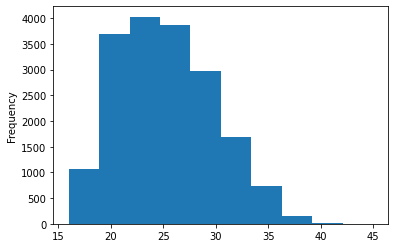

In [90]:
# quantidades de jogadores por idade
df_fifa.age.plot.hist()

In [84]:
# menores e maiores quantidades de jogadores por clube
d(df_fifa.groupby('club')['name'].count().sort_values(),
  filtros = [lambda x: x<=20, lambda x: x>=33] )

club
Derry City                   18
Sligo Rovers                 19
Limerick FC                  19
Bahia                        20
Botafogo                     20
Tromsø IL                    20
Atlético Mineiro             20
Internacional                20
Grêmio                       20
Ceará Sporting Club          20
Chapecoense                  20
Vitória                      20
Cruzeiro                     20
Sport Club do Recife         20
Paraná                       20
Fluminense                   20
América FC (Minas Gerais)    20
Atlético Paranaense          20
Santos                       20
Name: name, dtype: int64

<br/>

club
Eintracht Frankfurt        33
Wolverhampton Wanderers    33
AS Monaco                  33
Real Madrid                33
Empoli                     33
CD Leganés                 33
Atlético Madrid            33
Rayo Vallecano             33
Chelsea                    33
Tottenham Hotspur          33
Arsenal                    33
Valencia CF                33
TSG 1899 Hoffenheim        33
Manchester United          33
Newcastle United           33
Liverpool                  33
Cardiff City               33
RC Celta                   33
FC Barcelona               33
Fortuna Düsseldorf         33
Frosinone                  33
Borussia Dortmund          33
Southampton                33
Everton                    33
Manchester City            33
Burnley                    33
Name: name, dtype: int64

<br/>

(651,)

In [93]:
df_fifa.groupby('club')['age'].mean().sort_index()

club
 SSV Jahn Regensburg     25.655172
1. FC Heidenheim 1846    24.000000
1. FC Kaiserslautern     23.846154
1. FC Köln               24.321429
1. FC Magdeburg          24.692308
                           ...    
Zagłębie Sosnowiec       26.240000
Çaykur Rizespor          25.433333
Örebro SK                24.037037
Östersunds FK            23.863636
Śląsk Wrocław            25.960000
Name: age, Length: 651, dtype: float64

In [94]:
pdod.max_rows = None
df_fifa.club.unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder